Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:15<00:00, 1394.59draws/s]


0.71175

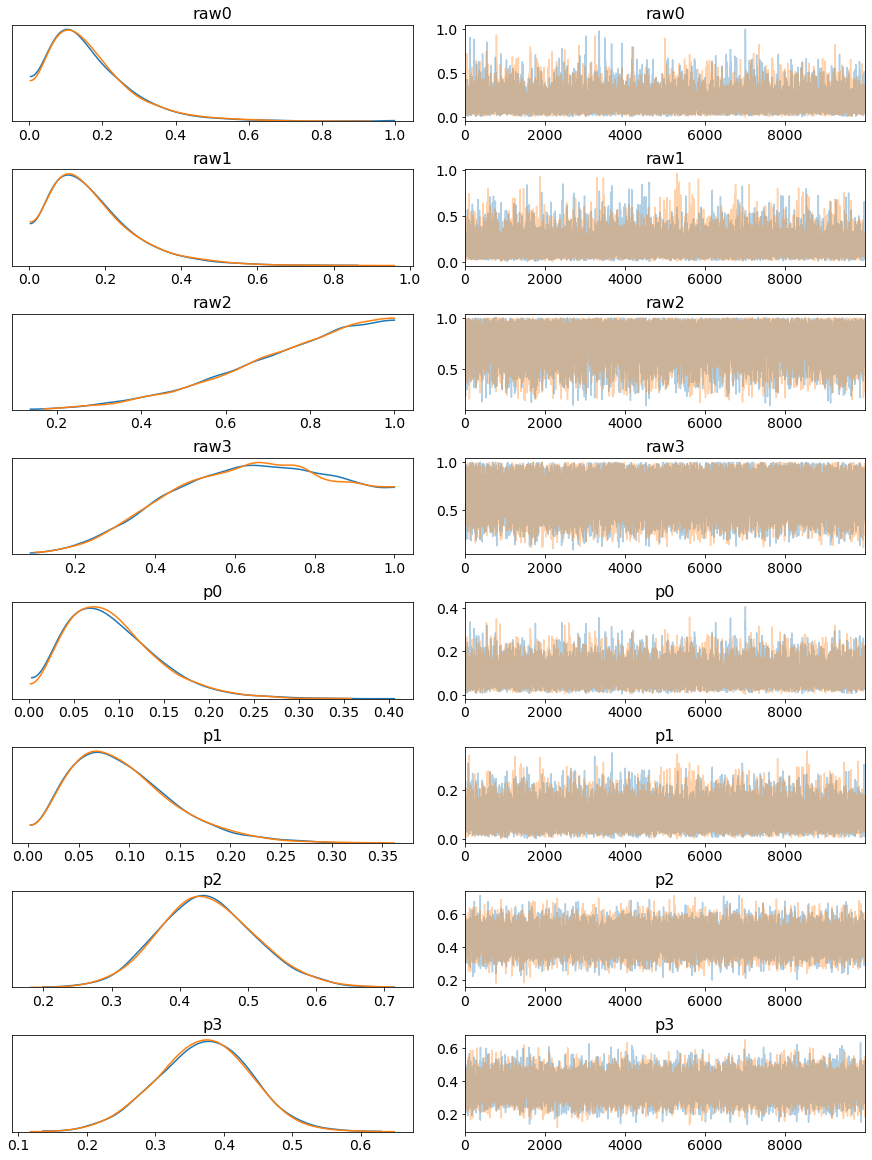

In [14]:
import pymc3 as pm
%matplotlib inline

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

def uniform_prior(pm, k):
    rs = [pm.Uniform('raw%s' % i, 0, 1) for i in range(k)]
    s = sum(rs)
    return [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(pm, k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(uniform_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [5]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.171681,0.116441,0.001065,0.013562,0.402874,12231.743922,0.999954
raw1,0.169871,0.114134,0.000889,0.009249,0.393215,13265.844376,0.999970
raw2,0.769091,0.170379,0.001691,0.440896,0.999948,8796.601020,0.999952
raw3,0.655672,0.197689,0.001838,0.315812,0.999988,10110.178957,0.999951
p0,0.093969,0.051063,0.000446,0.009352,0.192703,14733.825627,0.999951
p1,0.093282,0.050500,0.000344,0.010100,0.191277,17734.387612,0.999981
p2,0.442604,0.071752,0.000510,0.306240,0.587486,17154.916566,0.999950
p3,0.370145,0.068806,0.000458,0.234027,0.504098,20588.709434,0.999965


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:18<00:00, 1130.57draws/s]
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7207536652202252, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


0.98735

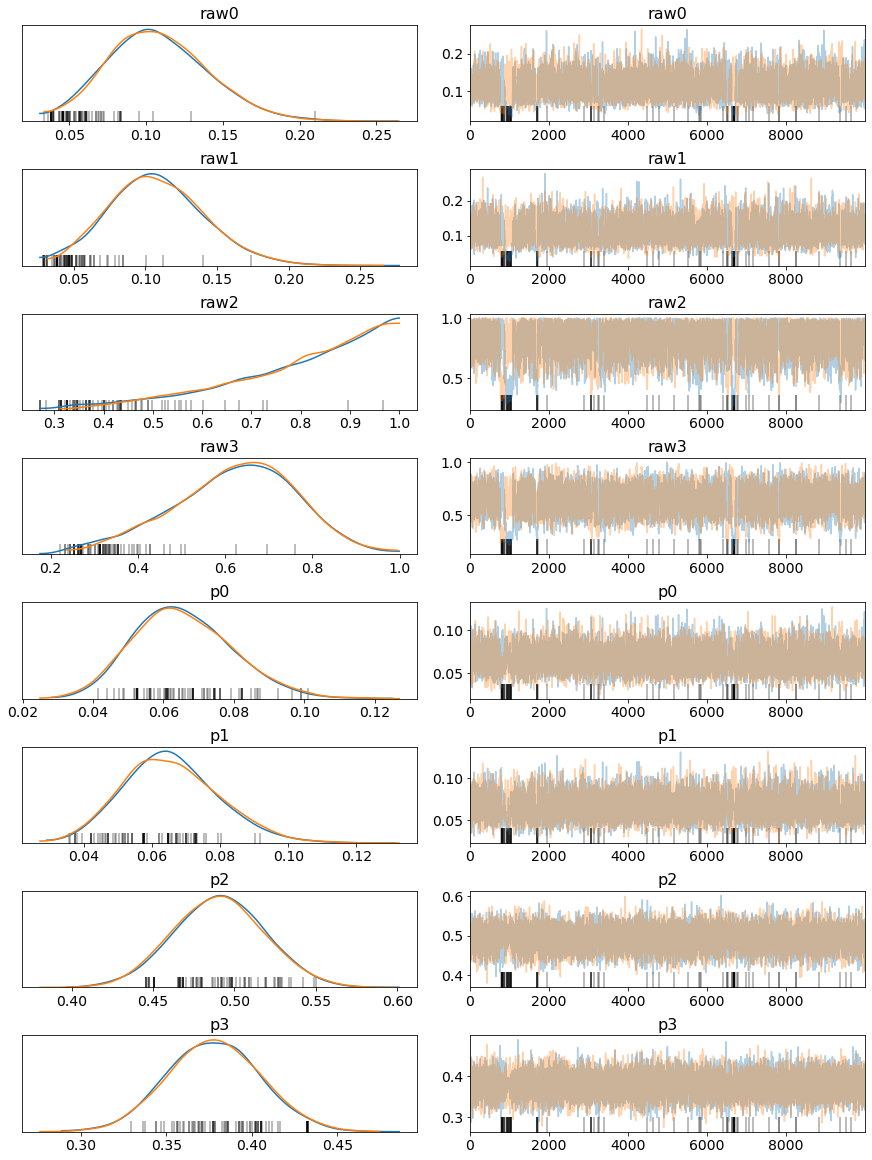

In [6]:
data = {
    'Carriage':  20,
    'Talabat':   20,
    'UberEats':  160,
    'Deliveroo': 120,
}
pm, trace = run_model(uniform_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [7]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.108203,0.032636,0.000837,0.045242,0.170364,1278.195603,1.000087
raw1,0.108389,0.033240,0.000874,0.044037,0.173071,1273.485562,1.000043
raw2,0.804759,0.155957,0.005493,0.490094,0.999921,648.138216,1.000218
raw3,0.623076,0.141202,0.004489,0.319160,0.872336,818.669199,1.000441
p0,0.065701,0.013869,0.000140,0.040714,0.093894,8161.616953,0.999950
p1,0.065660,0.013938,0.000164,0.040200,0.094340,7588.257326,0.999951
p2,0.490725,0.027598,0.000282,0.436979,0.544634,9481.192290,1.000133
p3,0.377914,0.026980,0.000252,0.325229,0.430527,12494.577859,1.000150


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:14<00:00, 1436.49draws/s]


0.89815

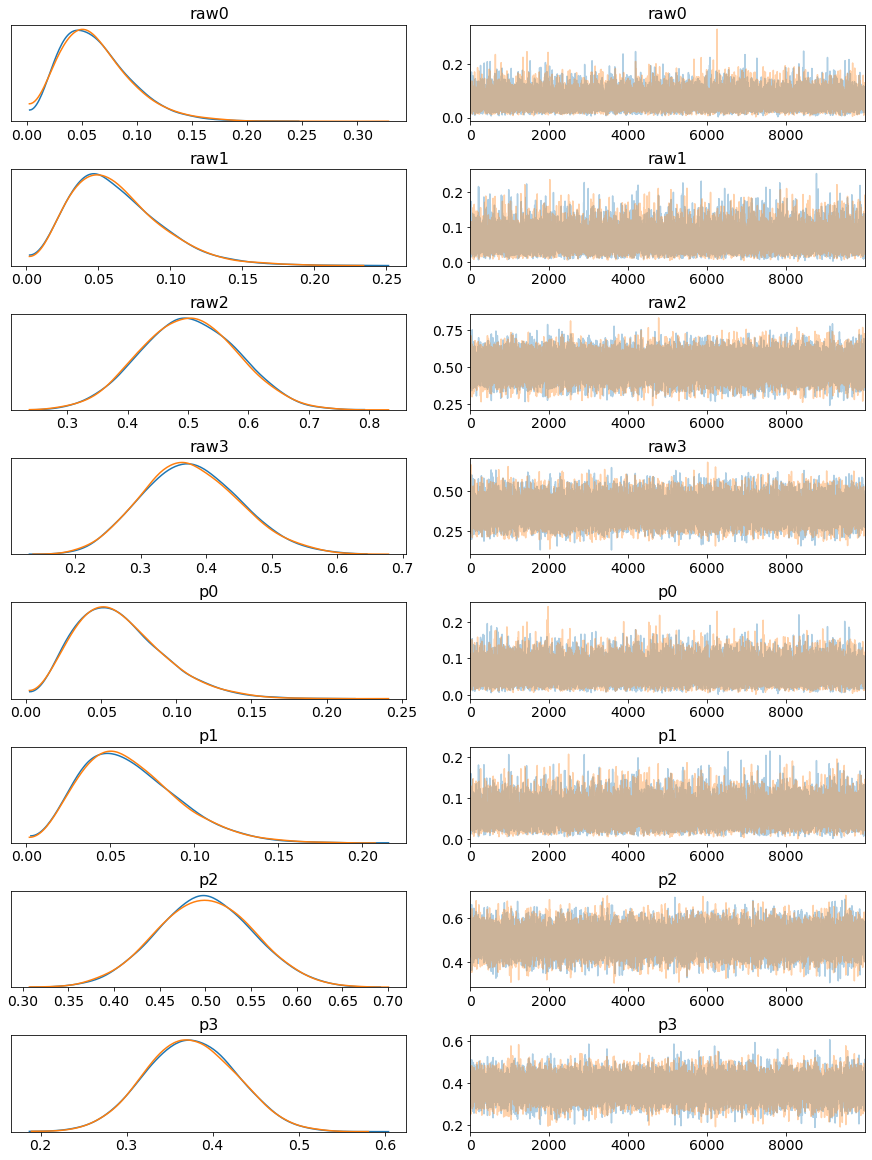

In [9]:
data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

# BAKING OBSERVATIONS INTO THE PRIOR IS A MODELLING MISTAKE, DON'T DO THIS
def beta_prior(pm, vals, k):
    rs = [pm.Beta('raw%s' % i, vals[i], sum(vals)-vals[i]) for i in range(k)]
    s = sum(rs)
    return [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(pm, vals, k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(beta_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [29]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.063432,0.031957,0.000189,0.012344,0.128142,26229.212520,0.999977
raw1,0.063393,0.031749,0.000203,0.010569,0.124913,21515.002650,0.999950
raw2,0.502057,0.080212,0.000491,0.344535,0.657690,27375.935753,0.999963
raw3,0.377858,0.073983,0.000430,0.236576,0.524036,26239.895412,0.999968
p0,0.062697,0.029413,0.000159,0.013641,0.121718,28608.397963,0.999964
p1,0.062633,0.029230,0.000179,0.011935,0.118982,23333.949630,0.999952
p2,0.499596,0.053679,0.000269,0.395720,0.603865,33467.223950,0.999960
p3,0.375074,0.052213,0.000295,0.272833,0.478047,34909.872701,0.999950


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ps]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:12<00:00, 1726.53draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21994400>,
      dtype=object)

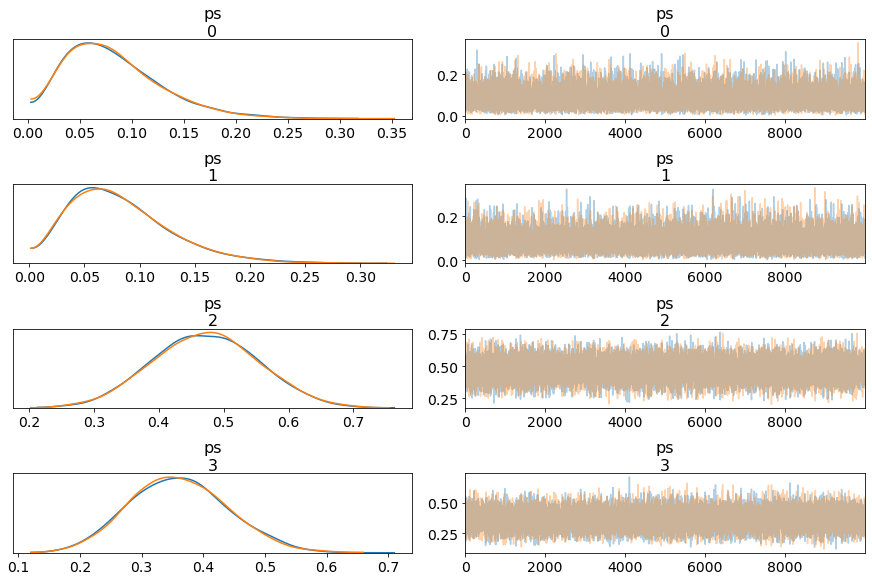

In [67]:
import numpy as np

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

def dirichlet_uniform_prior(pm, k):
    return pm.Dirichlet('ps', a=1*np.ones(k))

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(pm, k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(dirichlet_uniform_prior, data)
pm.traceplot(trace)

In [68]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ps__0,0.083103,0.045506,0.000336,0.010427,0.174468,20937.173870,0.999993
ps__1,0.083172,0.045346,0.000342,0.008326,0.171482,20098.632216,0.999952
ps__2,0.472632,0.081438,0.000542,0.314755,0.630777,26668.077807,0.999978
ps__3,0.361094,0.078558,0.000482,0.216343,0.520106,26568.453867,0.999951


In [69]:
hypothesis = [ps[2] == max(ps) for ps in trace['ps']]
sum(hypothesis) / len(hypothesis)

0.77455

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ps]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:12<00:00, 1664.75draws/s]


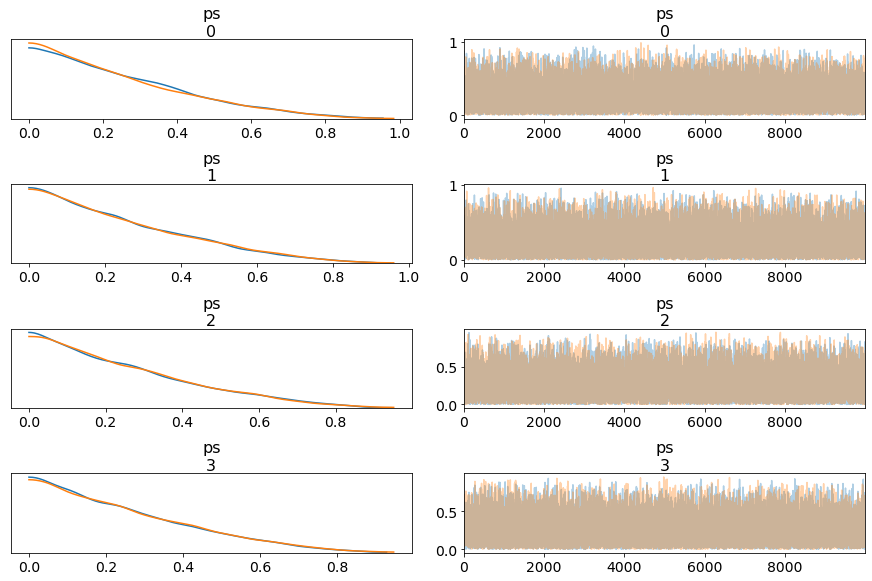

In [70]:
with pm.Model() as model:
    k = 4
    pm.Dirichlet('ps', a=1*np.ones(k))
    trace = pm.sample(draws=10*1000, progressbar=True)
    pm.traceplot(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:13<00:00, 1607.26draws/s]


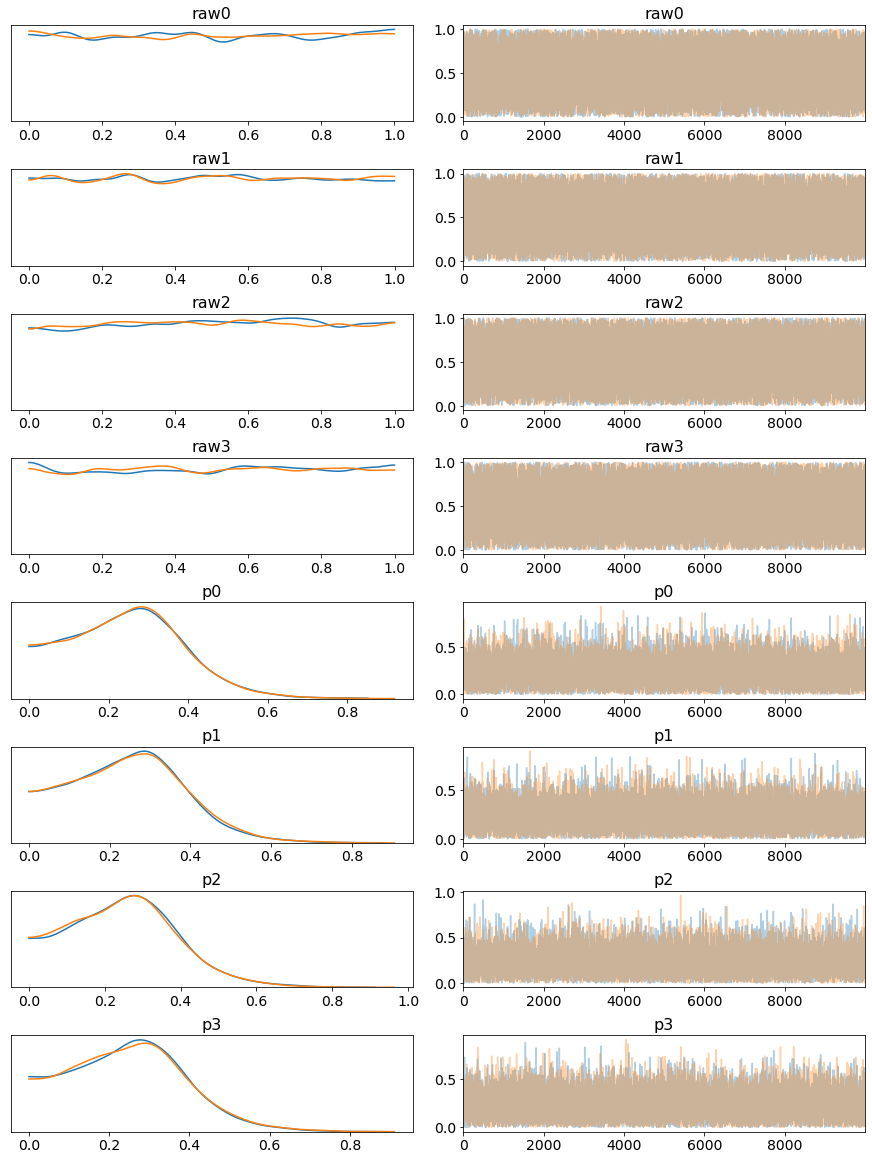

In [56]:
with pm.Model() as model:
    k = 4
    rs = [pm.Uniform('raw%s' % i, 0, 1) for i in range(k)]
    s = sum(rs)
    [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]
    trace = pm.sample(draws=10*1000, progressbar=True)
    pm.traceplot(trace)

In [71]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ps__0,0.249703,0.193535,0.001257,0.000001,0.634303,21103.292881,1.000301
ps__1,0.249874,0.193827,0.001279,0.000019,0.629745,24742.137766,0.999991
ps__2,0.250696,0.195054,0.001349,0.000066,0.635195,21612.833071,0.999956
ps__3,0.249726,0.192605,0.001236,0.000020,0.627852,21710.042991,1.000047
